In [1]:
from bs4 import BeautifulSoup

In [2]:
import time
import json
import urllib
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#국제_국내항공 여객수

import requests
import math
key1 ='suCRrNjscrjE%2BO8K90jEKvai41x0TWioUg6A5yZSSnTz1DeWKjqj%2Fk4tg1a%2FBDsFQaKPPnZXGBp9kz1nLHI79Q%3D%3D'
key2 ='suCRrNjscrjE+O8K90jEKvai41x0TWioUg6A5yZSSnTz1DeWKjqj/k4tg1a/BDsFQaKPPnZXGBp9kz1nLHI79Q=='

page = 1
perPage = 10
url = 'https://api.odcloud.kr/api/15101105/v1/uddi:9211e576-ee9c-4284-aa7e-9fd10b6be376?page=1&perPage=10&serviceKey=suCRrNjscrjE%2BO8K90jEKvai41x0TWioUg6A5yZSSnTz1DeWKjqj%2Fk4tg1a%2FBDsFQaKPPnZXGBp9kz1nLHI79Q%3D%3D'
params ={
    'serviceKey' : key2, 
    'page': page,
    'perPage': perPage
}

params
resp = requests.get(url, params=params)
data = json.loads(resp.text)
totalPage =  math.ceil(data['totalCount'] / perPage)
totalPage

year = []
count = []

for i in range(1, totalPage + 1):
    url = 'https://api.odcloud.kr/api/15101105/v1/uddi:9211e576-ee9c-4284-aa7e-9fd10b6be376'
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5) + round(np.random.random(),2)
    time.sleep(a)
    params ={
        'serviceKey' : key2, 
        'page': i,
        'perPage':10
    }
#     print('-------------------------')
    resp = requests.get(url, params=params)
    data = json.loads(resp.text)
#     print(data['data'])
    for d in data['data']:
        year.append(d['구분'])
        count.append(d['여객(명)'])

df1 = pd.DataFrame(year[-5:], columns=['year'])

df2 = pd.DataFrame(count[-5:], columns=['count'])

concat_df = pd.concat([df1,df2], axis= 1)
concat_df

,year,count
0,2017,"109,361,974"
1,2018,"117,525,898"
2,2019,"123,366,608"
3,2020,"39,403,960"
4,2021,"36,355,341"


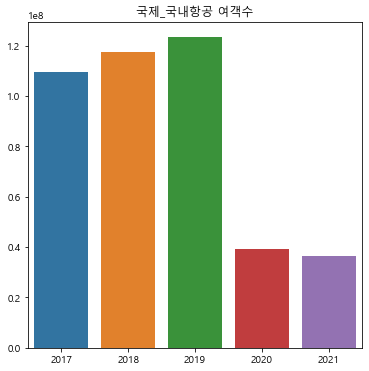

In [5]:
numbers = [int(d.replace(',','')) for d in concat_df['count'].values]
numbers

plt.figure(figsize=(6,6))
plt.rc('font', family='Malgun Gothic')
plt.title('국제_국내항공 여객수')
sns.barplot(x= concat_df['year'].values, y=numbers)

plt.show()

In [6]:
# 총 출입국자 현황 

url = 'https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1756'

res = requests.get(url)

html = BeautifulSoup(res.text, 'html.parser')


header = html.select('#t_Table_175601 >thead >tr > th')[1:5]
years = [h.text for h in header]
#years
content = html.select('#t_Table_175601 > tbody > tr >th')
left_columns = [c.text.replace('-\xa0','') for c in content]
left_columns

values = []
for h in html.select('#t_Table_175601 > tbody > tr td'):
    values.append(h.text)

datas = np.reshape(values, (5,4))  

df1 = pd.DataFrame(datas, columns=years, index=left_columns)
df1

,2017,2018,2019,2020
총계,"80,407","88,908","93,548","14,701"
출국자,"40,158","44,363","46,777","7,172"
입국자,"40,249","44,544","46,770","7,529"
국민,"53,445","57,860","57,795","9,171"
외국인,"26,962","31,048","35,752","5,530"


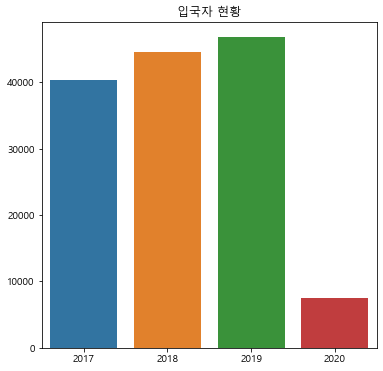

In [7]:
numbers = [int(d.replace(',','')) for d in df1.loc['입국자'].values]
outs = [int(d.replace(',','')) for d in df1.loc['출국자'].values]
plt.figure(figsize=(6,6))
plt.rc('font', family='Malgun Gothic')
plt.title('입국자 현황')
sns.barplot(x= df1.columns.values, y=numbers)

plt.show()

In [25]:
#공공데이터활용지원센터_보건복지부 코로나19 감염 현황
# 2020, 2021, 2022



url ='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
key = 'suCRrNjscrjE+O8K90jEKvai41x0TWioUg6A5yZSSnTz1DeWKjqj/k4tg1a/BDsFQaKPPnZXGBp9kz1nLHI79Q=='


merged_df = pd.DataFrame([])
for year in range(2020, 2022+1):
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5) + round(np.random.random(),2)
    time.sleep(a)
    params = {
        'ServiceKey': key,
        'pageNo': 1,
        'numOfRows':10,
        'startCreateDt': str(year)+ '0101',	
        'endCreateDt':  str(year) + '1231'
    }
    res = requests.get(url, params =params)
    soup = BeautifulSoup(res.text, 'xml')
    date = []
    decideCnt = []
    for item in soup.findAll('item'):
        date.append(item.find('stateDt').get_text())
        decideCnt.append(item.find('decideCnt').get_text())
    pd1 = pd.DataFrame(date, columns=['year'])
    pd2 = pd.DataFrame(decideCnt, columns=['decideCnt'])
    total = pd.concat([pd1, pd2], axis = 1)
    total.sort_values(by=['year'], inplace=True)
    merged_df = pd.concat([merged_df, total])
merged_df.reset_index(drop= True, inplace=True)
merged_df

,year,decideCnt
0,20200120,1
1,20200121,1
2,20200122,1
3,20200123,1
4,20200124,2
...,...,...
885,20220626,18325966
886,20220627,18329389
887,20220628,18339283
888,20220629,18349746


In [50]:
#코로나 바이러스 확진자 수 추이
diff = []
for index, data in enumerate(merged_df['decideCnt']):
    if (index  - 1)  > -1:
        diff.append(int(merged_df['decideCnt'].loc[index]) - int(merged_df['decideCnt'].loc[index -1]))
    else:
        diff.append(int(merged_df['decideCnt'].loc[index]))
diff

[1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 3,
 4,
 1,
 3,
 0,
 1,
 5,
 3,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 34,
 16,
 74,
 190,
 210,
 207,
 130,
 253,
 449,
 427,
 909,
 595,
 686,
 600,
 516,
 438,
 518,
 483,
 367,
 248,
 131,
 242,
 114,
 110,
 107,
 76,
 74,
 84,
 93,
 152,
 87,
 147,
 98,
 64,
 76,
 100,
 104,
 91,
 146,
 105,
 78,
 125,
 101,
 89,
 86,
 94,
 81,
 47,
 47,
 53,
 39,
 27,
 30,
 32,
 25,
 27,
 27,
 22,
 22,
 18,
 8,
 13,
 9,
 11,
 8,
 6,
 10,
 10,
 10,
 14,
 9,
 4,
 9,
 6,
 13,
 8,
 3,
 2,
 4,
 12,
 18,
 34,
 35,
 27,
 26,
 56,
 19,
 13,
 15,
 13,
 32,
 12,
 20,
 23,
 25,
 16,
 19,
 40,
 79,
 58,
 39,
 27,
 35,
 38,
 49,
 39,
 39,
 51,
 57,
 37,
 38,
 50,
 45,
 56,
 48,
 34,
 37,
 34,
 43,
 59,
 49,
 67,
 48,
 17,
 46,
 51,
 28,
 39,
 51,
 62,
 42,
 42,
 51,
 54,
 61,
 63,
 61,
 48,
 44,
 62,
 50,
 45,
 35,
 44,
 62,
 33,
 39,
 61,
 60,
 39,
 34,
 26,
 45,
 63,
 59,
 41,
 113,
 58,
 25,
 28,
 48,
 18,
 36,
 31,
 30,
 23,
 34,
 33,
 43,
 20,
 43,
 36,
 

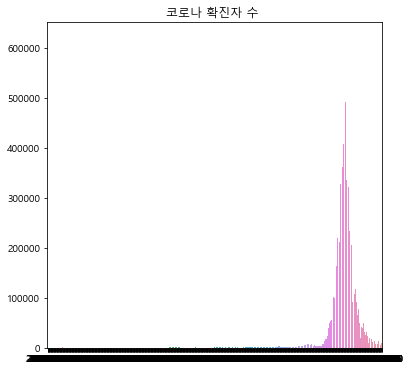

In [53]:
#코로나 바이러스 확진자 수 추이
numbers = diff

plt.figure(figsize=(6,6))
plt.rc('font', family='Malgun Gothic')
plt.title('코로나 확진자 수 ')
sns.barplot(x= merged_df['year'].values, y=numbers)

plt.show()

In [55]:
#코로나 바이러스 가장 심각한 날 
index = np.argmax(diff)

merged_df['year'][index]

'20220317'

In [9]:
merged_df.to_csv('covid status.csv')

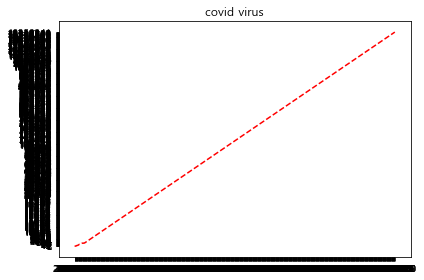

In [10]:
# 코로나 추이 그래프 

years = [2020, 2021, 2022]
plt.plot(merged_df["year"], merged_df["decideCnt"], 'r--')
plt.title('covid virus')
plt.tight_layout() # 여백줄이기
plt.show()

In [12]:
df_2018_heatmap = pd.read_csv('data/2018/20220627195242_방문자수 히트맵.csv', encoding='cp949')

df_2019_heatmap =  pd.read_csv('data/2019/20220627195251_방문자수 히트맵.csv', encoding='cp949')
df_2020_heatmap = pd.read_csv('data/2020/20220627195259_방문자수 히트맵.csv', encoding='cp949')
df_2021_heatmap = pd.read_csv('data/2021/20220627195310_방문자수 히트맵.csv', encoding='cp949')
index_list =  df_2018_heatmap['광역지자체']

total = pd.concat([df_2018_heatmap['방문자 수'], df_2019_heatmap['방문자 수'], df_2020_heatmap['방문자 수'], df_2021_heatmap['방문자 수']], axis =1).rename(index_list)
total.columns = [2018, 2019, 2020, 2021]
total

,2018,2019,2020,2021
서울특별시,606282720.0,676239448.0,486063680.0,487463395.0
부산광역시,149628499.0,154956548.0,125355958.0,124393966.0
대구광역시,105117110.0,107487542.0,86338895.0,87781593.0
인천광역시,159550161.0,186061142.0,137306507.0,136489732.0
광주광역시,63837307.0,66038784.0,56689650.0,56320473.0
대전광역시,82585850.0,83628100.0,69557253.0,69189201.0
울산광역시,46433222.0,48862667.0,43482816.0,43034413.0
세종특별자치시,23109587.0,25285404.0,23948388.0,25413200.0
경기도,591259444.0,664749407.0,550763372.0,552531290.0
강원도,135219733.0,145612023.0,131296509.0,130321244.0


In [13]:
rate_19 = (df_2019_heatmap['방문자 수'] - df_2019_heatmap['전년도 방문자 수'])/df_2019_heatmap['전년도 방문자 수']
rate_20 = (df_2020_heatmap['방문자 수'] - df_2020_heatmap['전년도 방문자 수'])/df_2020_heatmap['전년도 방문자 수']
rate_21 = (df_2021_heatmap['방문자 수'] - df_2021_heatmap['전년도 방문자 수'])/df_2021_heatmap['전년도 방문자 수']

In [14]:
df_total_transition_rate = pd.DataFrame(#index=df_2018_heatmap.광역지자체,
                                       data={'rate_19':rate_19,
                                             'rate_20':rate_20,
                                             'rate_21':rate_21})
df_total_transition_rate.set_index(df_2018_heatmap['광역지자체'], inplace=True)
df_total_transition_rate

,rate_19,rate_20,rate_21
광역지자체,,,
서울특별시,0.115386,-0.281225,0.002880
부산광역시,0.035609,-0.191025,-0.007674
대구광역시,0.022550,-0.196754,0.016710
인천광역시,0.166161,-0.262036,-0.005949
광주광역시,0.034486,-0.141570,-0.006512
대전광역시,0.012620,-0.168255,-0.005291
울산광역시,0.052321,-0.110101,-0.010312
세종특별자치시,0.094152,-0.052877,0.061165
경기도,0.124294,-0.171472,0.003210


In [39]:
total

,2018,2019,2020,2021
서울특별시,606282720.0,676239448.0,486063680.0,487463395.0
부산광역시,149628499.0,154956548.0,125355958.0,124393966.0
대구광역시,105117110.0,107487542.0,86338895.0,87781593.0
인천광역시,159550161.0,186061142.0,137306507.0,136489732.0
광주광역시,63837307.0,66038784.0,56689650.0,56320473.0
대전광역시,82585850.0,83628100.0,69557253.0,69189201.0
울산광역시,46433222.0,48862667.0,43482816.0,43034413.0
세종특별자치시,23109587.0,25285404.0,23948388.0,25413200.0
경기도,591259444.0,664749407.0,550763372.0,552531290.0
강원도,135219733.0,145612023.0,131296509.0,130321244.0


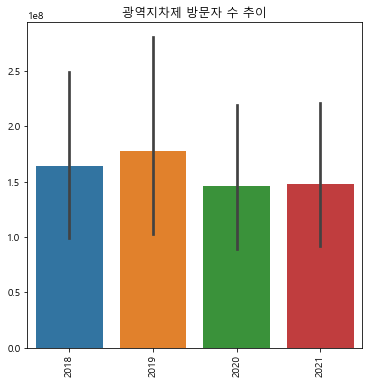

In [15]:
plt.figure(figsize=(6,6))
plt.rc('font', family='Malgun Gothic')
plt.title('광역지차제 방문자 수 추이')
plt.xticks(rotation = 90)
sns.barplot(data= total)
plt.show()

In [16]:
total.index.values

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [17]:
df_2018_visitor = pd.read_csv('data/2018/20220627195242_광역별 방문자 수.csv',  encoding='cp949')

df_2018_visitor

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,고성군,239201073.0,3.3,9902786.0,4.1
1,강원도,춘천시,239201073.0,3.3,26684111.0,11.2
2,강원도,원주시,239201073.0,3.3,29707426.0,12.4
3,강원도,강릉시,239201073.0,3.3,31662185.0,13.2
4,강원도,동해시,239201073.0,3.3,10110320.0,4.2
...,...,...,...,...,...,...
245,충청북도,단양군,226738982.0,3.1,8282963.0,3.7
246,충청북도,청주시 상당구,226738982.0,3.1,29496991.0,13.0
247,충청북도,청주시 서원구,226738982.0,3.1,31070361.0,13.7
248,충청북도,청주시 흥덕구,226738982.0,3.1,33534409.0,14.8


In [18]:
df_2018_visitor['기초지자체 방문자 수']

0       9902786.0
1      26684111.0
2      29707426.0
3      31662185.0
4      10110320.0
          ...    
245     8282963.0
246    29496991.0
247    31070361.0
248    33534409.0
249    25047208.0
Name: 기초지자체 방문자 수, Length: 250, dtype: float64

In [19]:
df_2018_visitor= pd.read_csv('data/2018/20220627195242_광역별 방문자 수.csv', encoding='cp949')

df_2019_visitor =  pd.read_csv('data/2019/20220627195251_광역별 방문자 수.csv', encoding='cp949')
df_2020_visitor = pd.read_csv('data/2020/20220627195259_광역별 방문자 수.csv', encoding='cp949')
df_2021_visitor = pd.read_csv('data/2021/20220627195310_광역별 방문자 수.csv', encoding='cp949')
index_list =  df_2018_visitor['기초지자체명']




total = pd.concat([df_2018_visitor['기초지자체 방문자 수'], df_2019_visitor['기초지자체 방문자 수'], df_2020_visitor['기초지자체 방문자 수'], df_2021_visitor['기초지자체 방문자 수']], axis =1).rename(index_list)
total.columns = [2018, 2019, 2020, 2021]
total

,2018,2019,2020,2021
고성군,9902786.0,10550924.0,11015058.0,11562375.0
춘천시,26684111.0,30513697.0,26796235.0,26862501.0
원주시,29707426.0,30608425.0,27394299.0,27186987.0
강릉시,31662185.0,32299061.0,31234595.0,30454953.0
동해시,10110320.0,10790192.0,10308451.0,9936522.0
...,...,...,...,...
단양군,8282963.0,8466913.0,6764180.0,7269015.0
청주시 상당구,29496991.0,30030642.0,27714992.0,27990075.0
청주시 서원구,31070361.0,31083847.0,27654706.0,27378586.0
청주시 흥덕구,33534409.0,33777215.0,30482701.0,32269781.0


In [20]:
total[total[2019] < total[2021]].index

Index(['고성군', '영월군', '평창군', '양양군', '고양시 덕양구', '구리시', '남양주시', '시흥시', '의왕시',
       '하남시', '파주시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '연천군', '가평군',
       '양평군', '고성군', '밀양시', '의령군', '함안군', '하동군', '합천군', '의성군', '영양군', '청도군',
       '고령군', '성주군', '예천군', '봉화군', '대덕구', '기장군', '북구', '강서구', '세종특별자치시', '울주군',
       '강화군', '옹진군', '나주시', '담양군', '고흥군', '화순군', '해남군', '영암군', '무안군', '함평군',
       '영광군', '장성군', '진도군', '신안군', '김제시', '완주군', '진안군', '임실군', '순창군', '부안군',
       '제주시', '서귀포시', '당진시', '태안군', '증평군', '진천군', '괴산군'],
      dtype='object')

In [21]:
total[total[2019] < total[2021]].loc['가평군']

2018    25059868.0
2019    23859560.0
2020    24485357.0
2021    25680487.0
Name: 가평군, dtype: float64

In [73]:
total[total[2019] < total[2021]].loc['양평군']

2018    30510324.0
2019    30038067.0
2020    30433756.0
2021    31785779.0
Name: 양평군, dtype: float64

In [22]:
total[total[2018] < total[2019]].index.values

array(['고성군', '춘천시', '원주시', '강릉시', '동해시', '태백시', '속초시', '삼척시', '홍천군',
       '영월군', '철원군', '화천군', '양구군', '인제군', '양양군', '고양시 덕양구', '고양시 일산동구',
       '고양시 일산서구', '성남시 수정구', '성남시 중원구', '성남시 분당구', '수원시 장안구', '수원시 영통구',
       '안산시 상록구', '의정부시', '안산시 단원구', '부천시', '평택시', '동두천시', '안양시 동안구',
       '용인시 처인구', '용인시 기흥구', '용인시 수지구', '과천시', '구리시', '남양주시', '오산시',
       '시흥시', '군포시', '의왕시', '하남시', '파주시', '이천시', '안성시', '김포시', '화성시',
       '광주시', '양주시', '포천시', '여주시', '연천군', '고성군', '창원시 마산합포구', '창원시 마산회원구',
       '창원시 진해구', '진주시', '통영시', '사천시', '김해시', '밀양시', '거제시', '양산시', '의령군',
       '함안군', '창녕군', '남해군', '하동군', '산청군', '함양군', '거창군', '합천군', '경주시',
       '김천시', '안동시', '구미시', '영주시', '영천시', '상주시', '문경시', '경산시', '군위군',
       '의성군', '영양군', '영덕군', '청도군', '고령군', '성주군', '칠곡군', '예천군', '봉화군',
       '울진군', '울릉군', '포항시 남구', '남구', '광산구', '동구', '수성구', '달서구', '달성군',
       '북구', '동구', '유성구', '대덕구', '서구', '강서구', '영도구', '부산진구', '해운대구',
       '사하구', '남구', '수영구', '기장군', '북구', '서구', '종로구', '강서구', '용산구', '성동구',
  

In [67]:
total[total[2019] < total[2021]].loc['영월군']

2018    6165800.0
2019    6180292.0
2020    6136994.0
2021    6612844.0
Name: 영월군, dtype: float64

In [7]:
rate_19 = (df_2019_visitor['기초지자체 방문자 수'] - df_2018_visitor['기초지자체 방문자 수'])/df_2019_visitor['기초지자체 방문자 수']
rate_20 = (df_2020_visitor['기초지자체 방문자 수'] - df_2019_visitor['기초지자체 방문자 수'])/df_2020_visitor['기초지자체 방문자 수']
rate_21 = (df_2021_visitor['기초지자체 방문자 수'] - df_2020_visitor['기초지자체 방문자 수'])/df_2021_visitor['기초지자체 방문자 수']


In [8]:
df_total_transition_rate = pd.DataFrame(#index=df_2018_heatmap.광역지자체,
                                       data={'rate_19':rate_19,
                                             'rate_20':rate_20,
                                             'rate_21':rate_21})
df_total_transition_rate.set_index(df_2018_visitor['기초지자체명'], inplace=True)
df_total_transition_rate

,rate_19,rate_20,rate_21
기초지자체명,,,
고성군,0.061430,0.042136,0.047336
춘천시,0.125504,-0.138731,0.002467
원주시,0.029436,-0.117328,-0.007625
강릉시,0.019718,-0.034080,-0.025600
동해시,0.063008,-0.046733,-0.037431
...,...,...,...
단양군,0.021726,-0.251728,0.069450
청주시 상당구,0.017770,-0.083552,0.009828
청주시 서원구,0.000434,-0.123998,-0.010085


In [10]:
total.loc['제주시'] , total.loc['서귀포시']

(2018    53751473.0
 2019    56242940.0
 2020    44781204.0
 2021    56912254.0
 Name: 제주시, dtype: float64,
 2018    40583453.0
 2019    41965025.0
 2020    33329042.0
 2021    44489970.0
 Name: 서귀포시, dtype: float64)

In [9]:
yangyang_2019 = pd.read_csv('./양양/2019/20220630130013_관광소비 유형.csv', encoding='cp949')

yangyang_2019


,업종대분류명,업종중분류명,중분류 소비액
0,쇼핑업,면세점,3.057643e+07
1,쇼핑업,관광기념품,6.768186e+08
2,쇼핑업,레저용품쇼핑,6.335992e+08
3,쇼핑업,대형쇼핑몰,1.246100e+07
4,숙박업,콘도,7.152825e+09
5,숙박업,기타숙박,3.428858e+09
6,숙박업,캠핑장/펜션,8.224006e+07
7,숙박업,호텔,3.226699e+07
8,식음료업,식음료,2.588534e+10
9,여가서비스업,골프장,4.605675e+09


In [12]:
yangyang_2020 = pd.read_csv('./양양/2020/20220630162258_관광소비 유형.csv', encoding='cp949')

yangyang_2020

,업종대분류명,업종중분류명,중분류 소비액
0,쇼핑업,면세점,9.018870e+06
1,쇼핑업,관광기념품,6.236616e+08
2,쇼핑업,레저용품쇼핑,7.079344e+08
3,쇼핑업,대형쇼핑몰,1.302905e+07
4,숙박업,콘도,5.902467e+09
5,숙박업,캠핑장/펜션,1.732361e+08
6,숙박업,기타숙박,3.576282e+09
7,숙박업,호텔,4.247602e+07
8,식음료업,식음료,2.956768e+10
9,여가서비스업,골프장,7.009191e+09


In [13]:
yangyang_2021 = pd.read_csv('./양양/2021/20220630125856_관광소비 유형.csv', encoding='cp949')

yangyang_2021


,업종대분류명,업종중분류명,중분류 소비액
0,쇼핑업,면세점,0.000000e+00
1,쇼핑업,관광기념품,6.664941e+08
2,쇼핑업,레저용품쇼핑,8.281100e+08
3,쇼핑업,대형쇼핑몰,1.341335e+07
4,숙박업,콘도,6.395710e+09
5,숙박업,캠핑장/펜션,1.803466e+08
6,숙박업,기타숙박,3.736401e+09
7,숙박업,호텔,3.457108e+07
8,식음료업,식음료,3.197474e+10
9,여가서비스업,골프장,4.436539e+09


In [16]:
yaygyang_total = pd.concat([yangyang_2019, yangyang_2020, yangyang_2021], axis =1)


yaygyang_total

,업종대분류명,업종중분류명,중분류 소비액,업종대분류명,업종중분류명,중분류 소비액,업종대분류명,업종중분류명,중분류 소비액
0,쇼핑업,면세점,3.057643e+07,쇼핑업,면세점,9.018870e+06,쇼핑업,면세점,0.000000e+00
1,쇼핑업,관광기념품,6.768186e+08,쇼핑업,관광기념품,6.236616e+08,쇼핑업,관광기념품,6.664941e+08
2,쇼핑업,레저용품쇼핑,6.335992e+08,쇼핑업,레저용품쇼핑,7.079344e+08,쇼핑업,레저용품쇼핑,8.281100e+08
3,쇼핑업,대형쇼핑몰,1.246100e+07,쇼핑업,대형쇼핑몰,1.302905e+07,쇼핑업,대형쇼핑몰,1.341335e+07
4,숙박업,콘도,7.152825e+09,숙박업,콘도,5.902467e+09,숙박업,콘도,6.395710e+09
5,숙박업,기타숙박,3.428858e+09,숙박업,캠핑장/펜션,1.732361e+08,숙박업,캠핑장/펜션,1.803466e+08
6,숙박업,캠핑장/펜션,8.224006e+07,숙박업,기타숙박,3.576282e+09,숙박업,기타숙박,3.736401e+09
7,숙박업,호텔,3.226699e+07,숙박업,호텔,4.247602e+07,숙박업,호텔,3.457108e+07
8,식음료업,식음료,2.588534e+10,식음료업,식음료,2.956768e+10,식음료업,식음료,3.197474e+10
9,여가서비스업,골프장,4.605675e+09,여가서비스업,골프장,7.009191e+09,여가서비스업,골프장,4.436539e+09
